# IMPORTING THE LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import kagglehub
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# LOADING THE DATASET

In [3]:
# data = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

In [4]:
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")
print("Path to dataset files:", path)
data = pd.read_csv(path + '/diabetes.csv')

Path to dataset files: /kaggle/input/pima-indians-diabetes-database


In [5]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [6]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.shape

(768, 9)

In [9]:
data.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
12           140      82             43             325      39.2  0.528                     58   1          1
             121      78             17             0        26.5  0.259                     62   0          1
             106      80             0              0        23.6  0.137                     44   0          1
             100      84             33             105      30.0  0.488                     46   0          1
             92       62             7              258      27.6  0.926                     44   1          1
                                                                                                            ..
0            78       88             29             40       36.9  0.434                     21   0          1
             74       52             10             36       27.8  0.269                     22   0          1
             73       0              0              0        21.1  0.342                     25   0          1
             67       76             0              0        45.3  0.194                     46   0          1
             57       60             0              0        21.7  0.735                     67   0          1
Name: count, Length: 768, dtype: int64

In [10]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [11]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Univariate Analysis

## Checking Null Values

In [12]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## No one has zero insulin/ zero glucose/ skinThickness / bloodpressure / BMI


In [13]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [14]:
data.isnull().sum()[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [15]:
data['Glucose'].fillna(data['Glucose'].median(),inplace=True)
data['BloodPressure'].fillna(data['BloodPressure'].median(),inplace=True)
data['SkinThickness'].fillna(data['SkinThickness'].median(),inplace=True)
data['Insulin'].fillna(data['Insulin'].median(),inplace=True)
data['BMI'].fillna(data['BMI'].median(),inplace=True)
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [16]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Duplicates

In [17]:
duplicate = data[data.duplicated()]
print("Duplicate rows:", duplicate.shape[0])
duplicate

Duplicate rows: 0


Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

## Ouliers Using Box plots

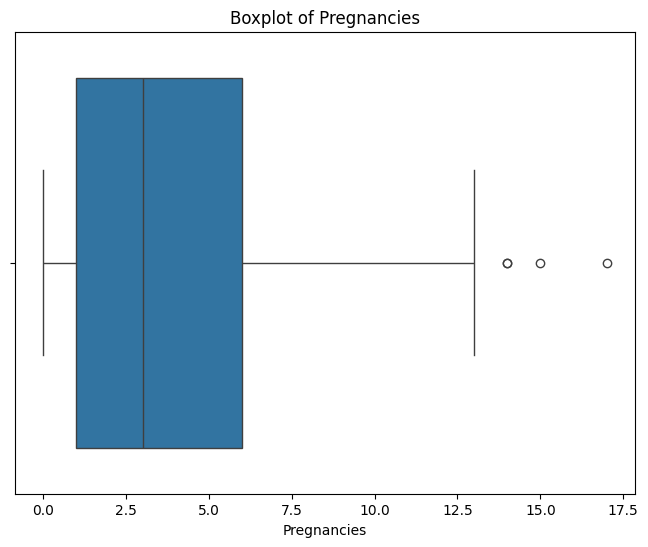

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Pregnancies'])
plt.title('Boxplot of Pregnancies')
plt.show()

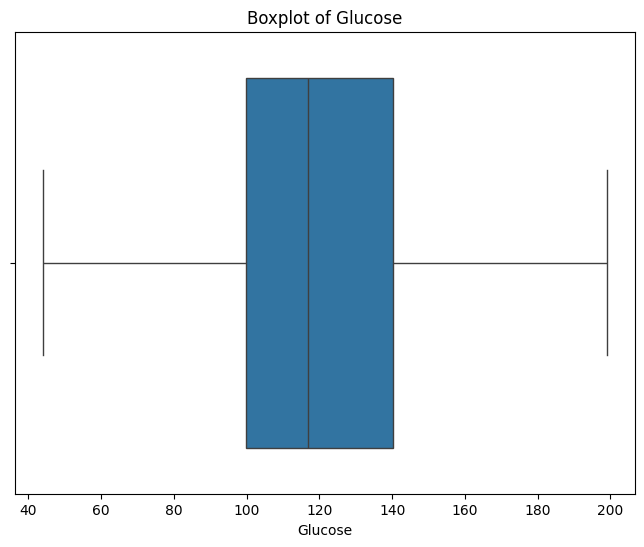

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Glucose'])
plt.title('Boxplot of Glucose')
plt.show()

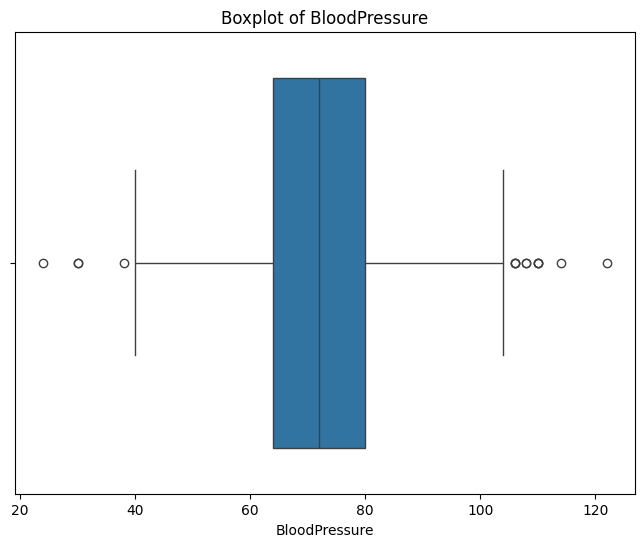

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['BloodPressure'])
plt.title('Boxplot of BloodPressure')
plt.show()

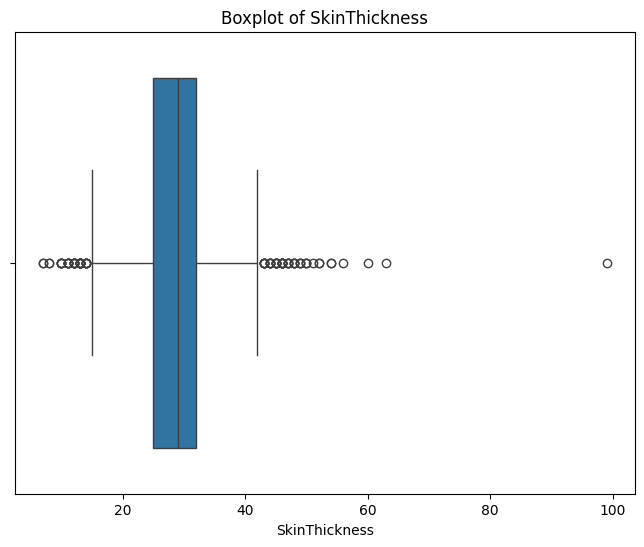

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['SkinThickness'])
plt.title('Boxplot of SkinThickness')
plt.show()

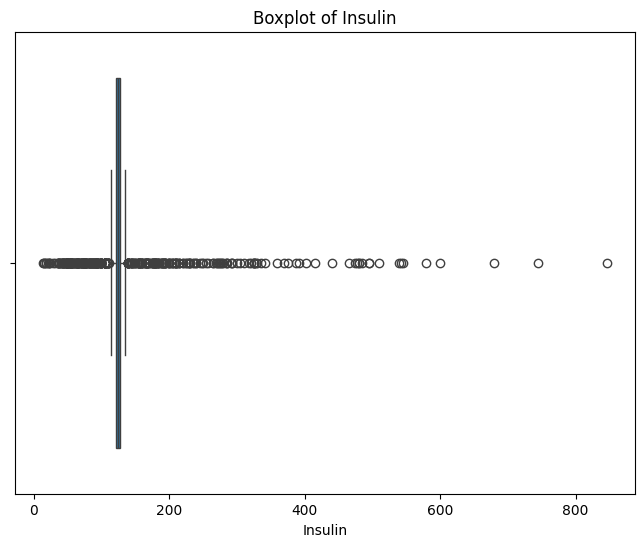

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Insulin'])
plt.title('Boxplot of Insulin')
plt.show()

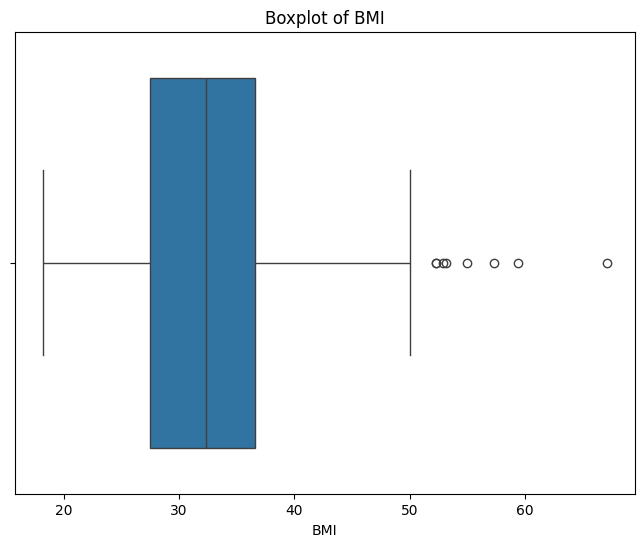

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['BMI'])
plt.title('Boxplot of BMI')
plt.show()

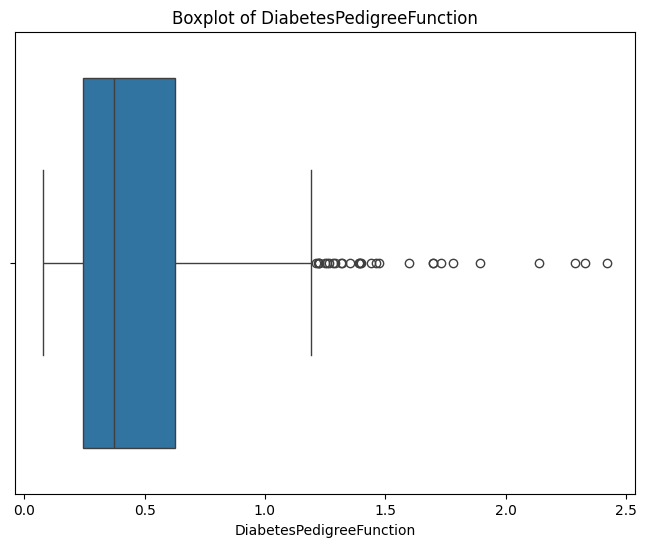

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['DiabetesPedigreeFunction'])
plt.title('Boxplot of DiabetesPedigreeFunction')
plt.show()

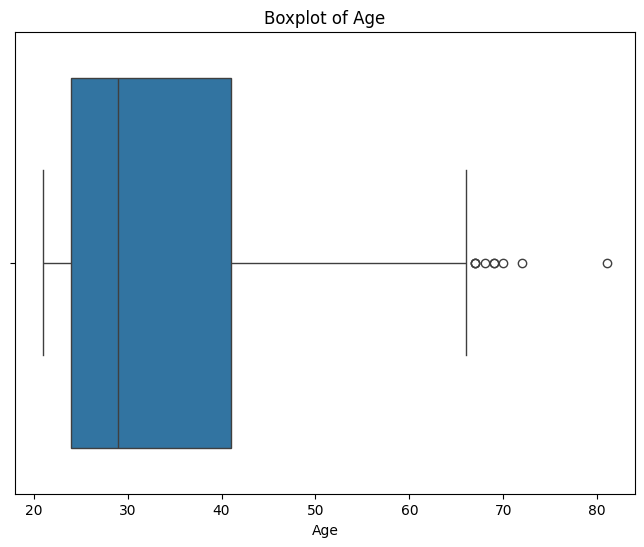

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Age'])
plt.title('Boxplot of Age')
plt.show()

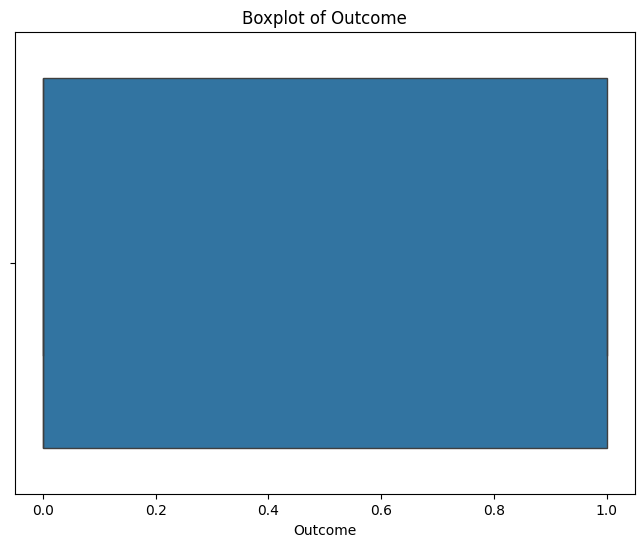

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Outcome'])
plt.title('Boxplot of Outcome')
plt.show()

## Numerical and target distribution

In [27]:
data.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

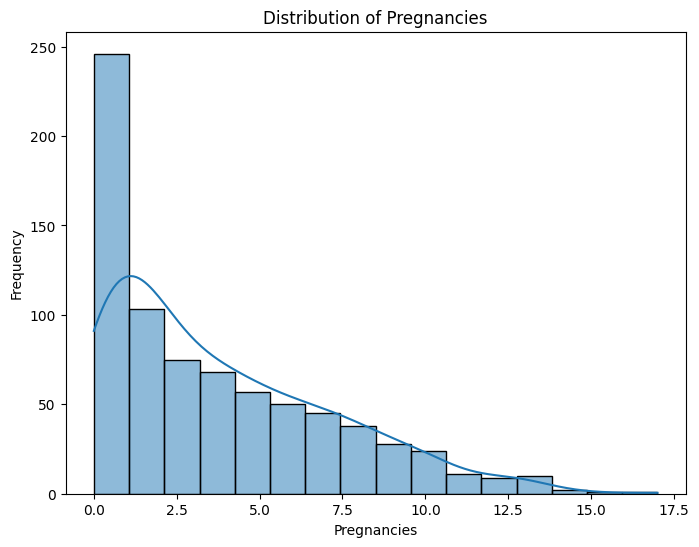

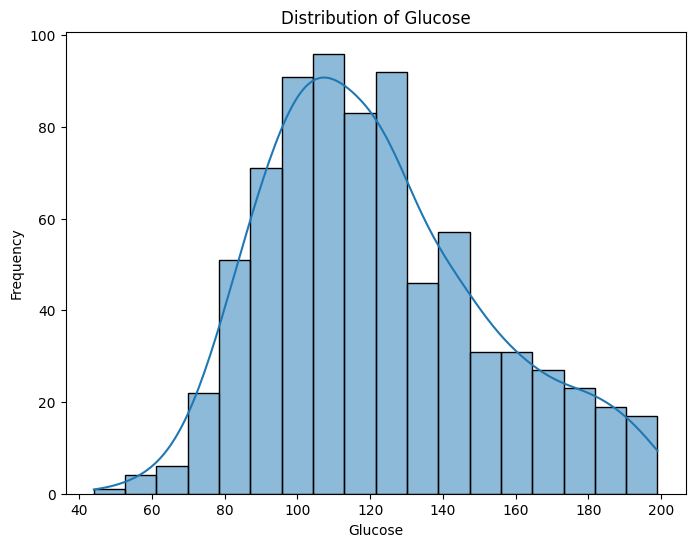

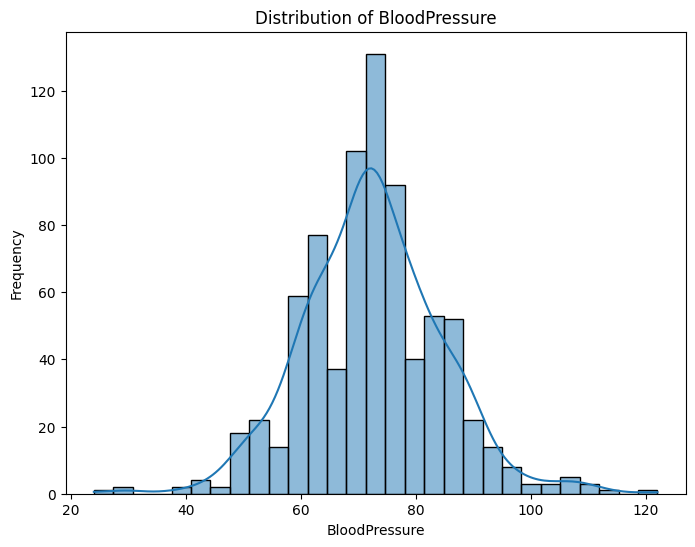

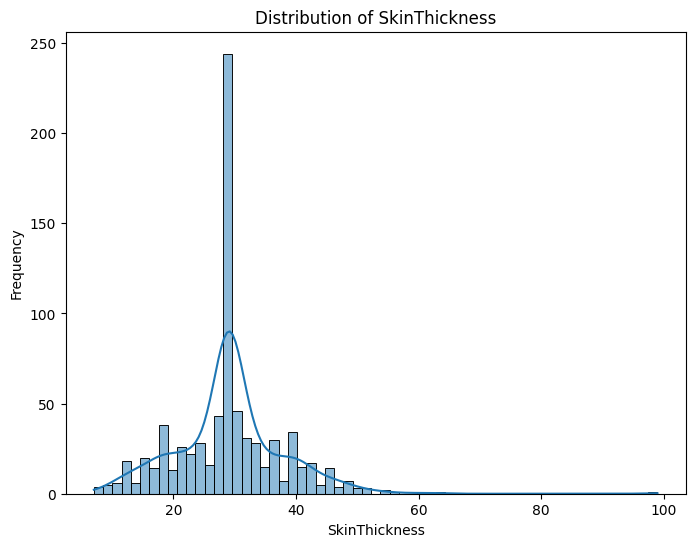

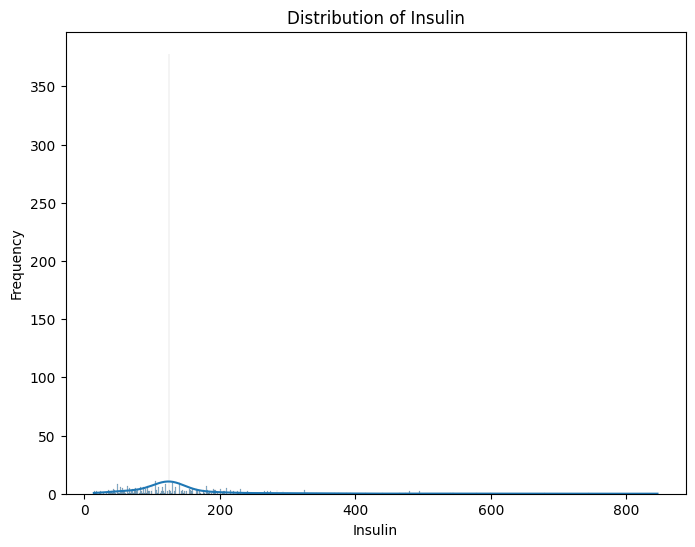

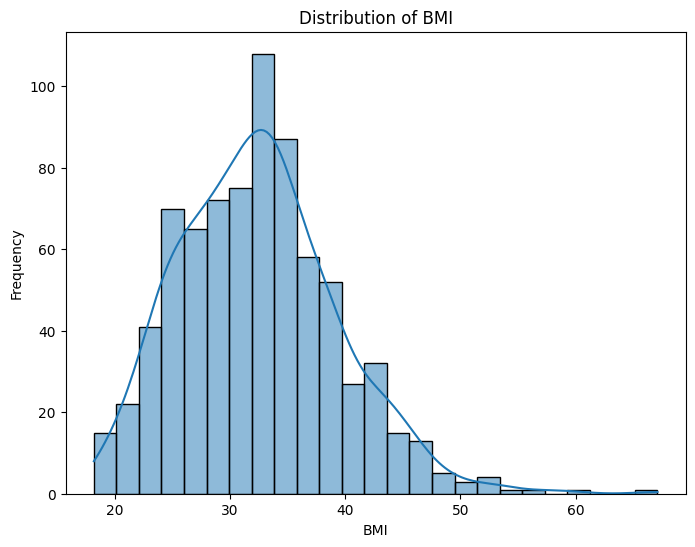

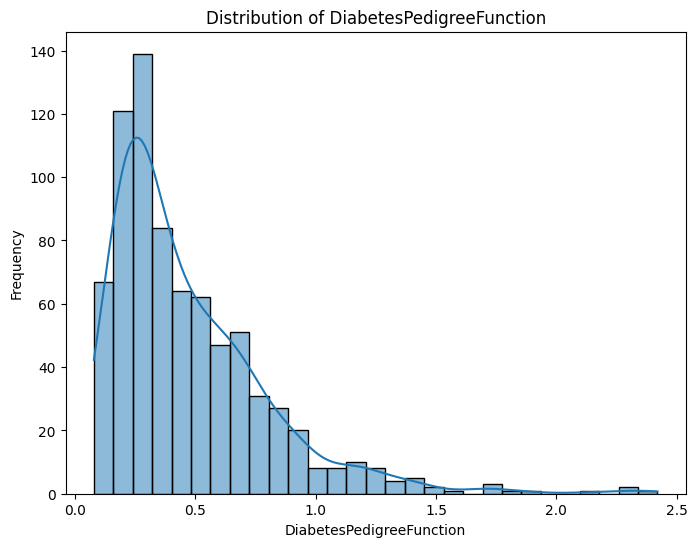

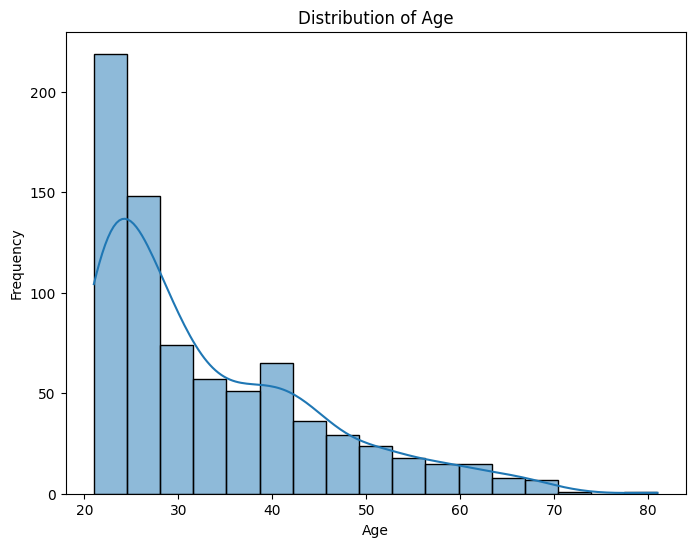

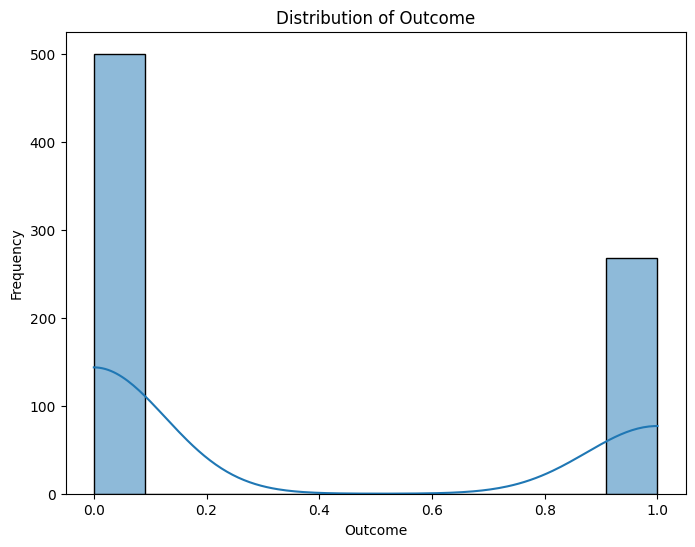

In [28]:
numerical_features = data.select_dtypes(include=['int64', 'float64'])
for col in numerical_features.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

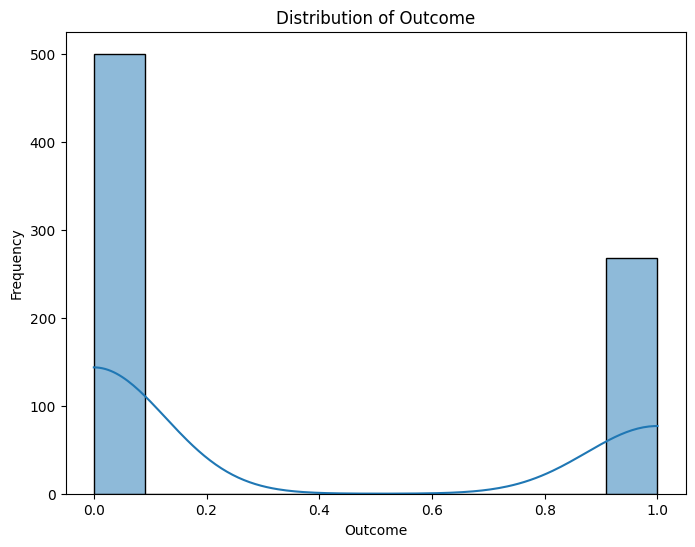

In [29]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Outcome'], kde=True)
plt.title('Distribution of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.show()

# Bivariate Analysis

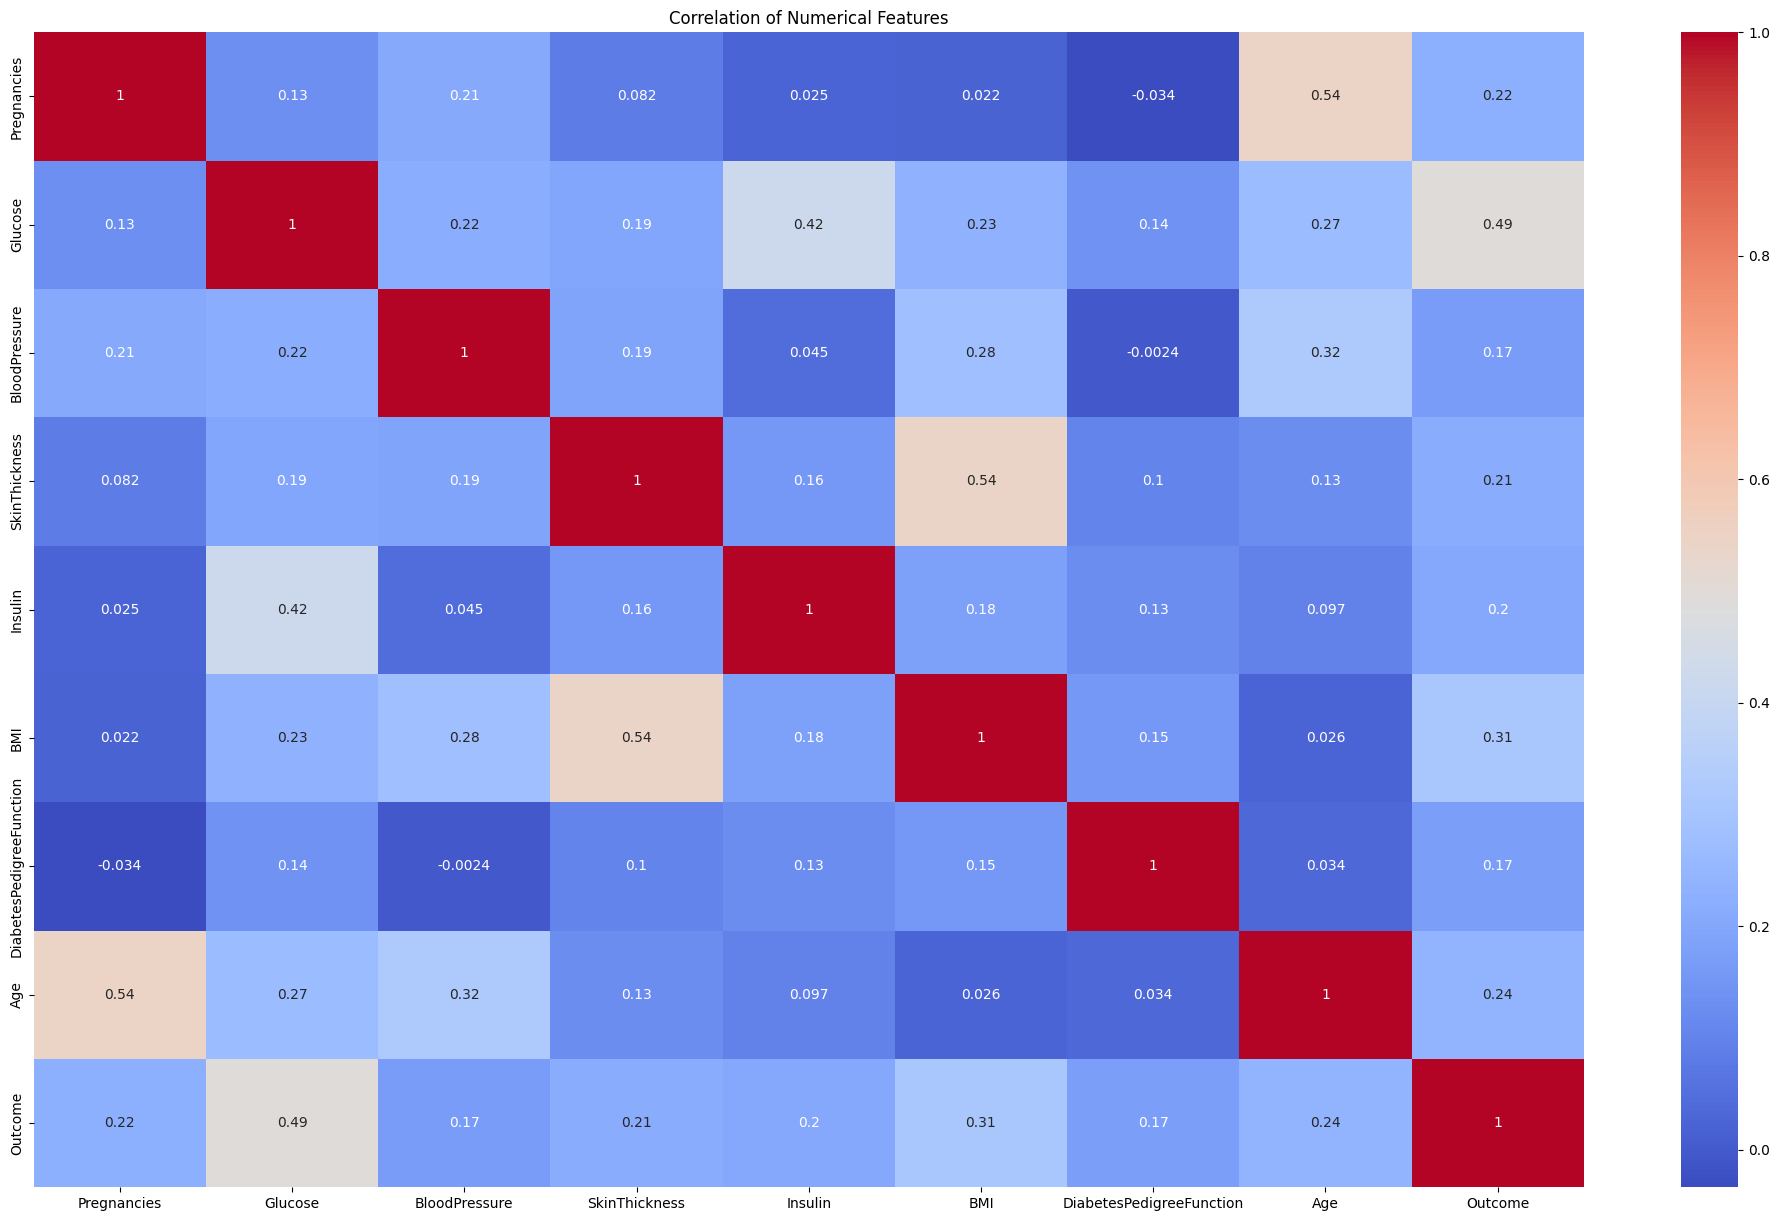

In [30]:
numerical_features = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation of Numerical Features')
plt.show()

In [31]:
data.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.128213       0.208615       0.081770   
Glucose                      0.128213  1.000000       0.218937       0.192615   
BloodPressure                0.208615  0.218937       1.000000       0.191892   
SkinThickness                0.081770  0.192615       0.191892       1.000000   
Insulin                      0.025047  0.419451       0.045363       0.155610   
BMI                          0.021559  0.231049       0.281257       0.543205   
DiabetesPedigreeFunction    -0.033523  0.137327      -0.002378       0.102188   
Age                          0.544341  0.266909       0.324915       0.126107   
Outcome                      0.221898  0.492782       0.165723       0.214873   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.025047  0.021559                 -0.033523   
Glucose                   0.419451  0.231049                  0.137327   
BloodPressure             0.045363  0.281257                 -0.002378   
SkinThickness             0.155610  0.543205                  0.102188   
Insulin                   1.000000  0.180241                  0.126503   
BMI                       0.180241  1.000000                  0.153438   
DiabetesPedigreeFunction  0.126503  0.153438                  1.000000   
Age                       0.097101  0.025597                  0.033561   
Outcome                   0.203790  0.312038                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.266909  0.492782  
BloodPressure             0.324915  0.165723  
SkinThickness             0.126107  0.214873  
Insulin                   0.097101  0.203790  
BMI                       0.025597  0.312038  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

<Axes: >

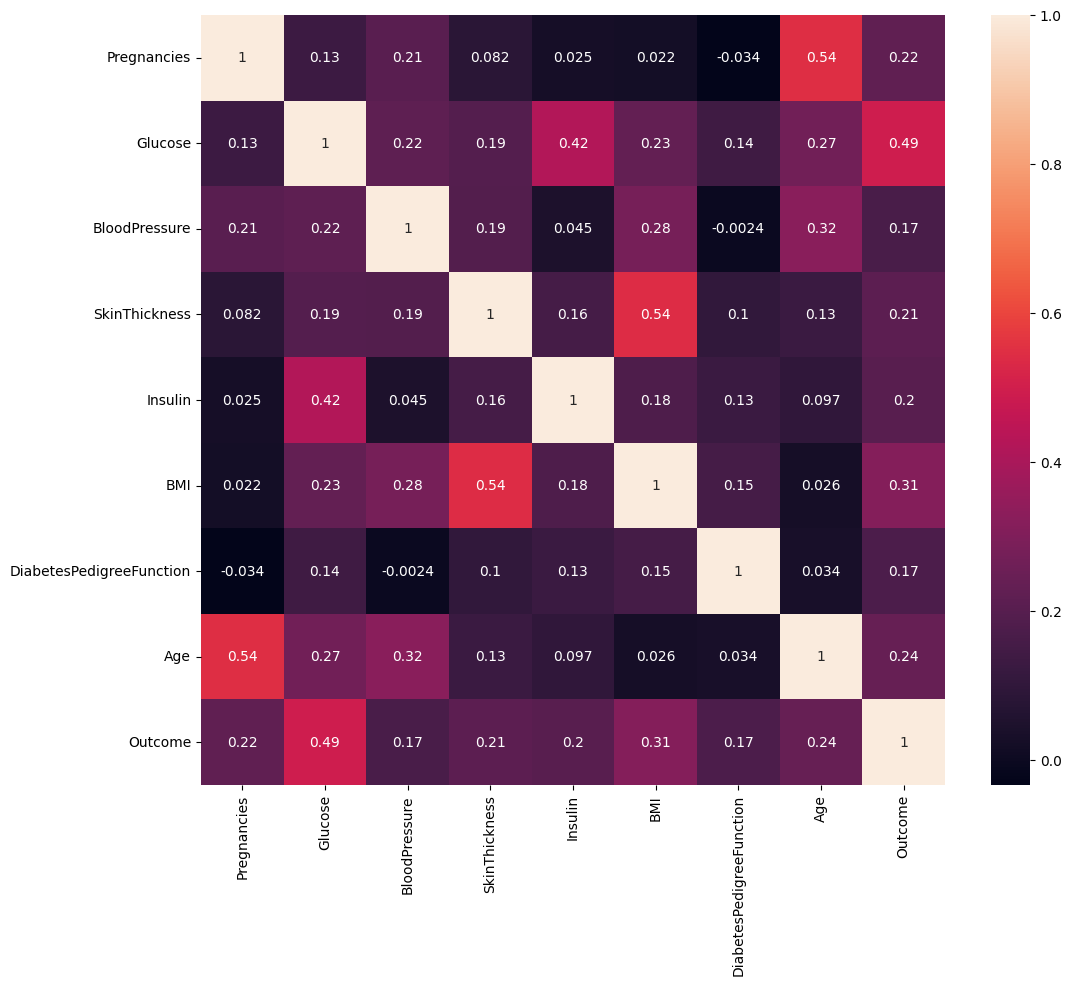

In [32]:
plt.figure(figsize = (12,10))

sns.heatmap(data.corr(), annot =True)

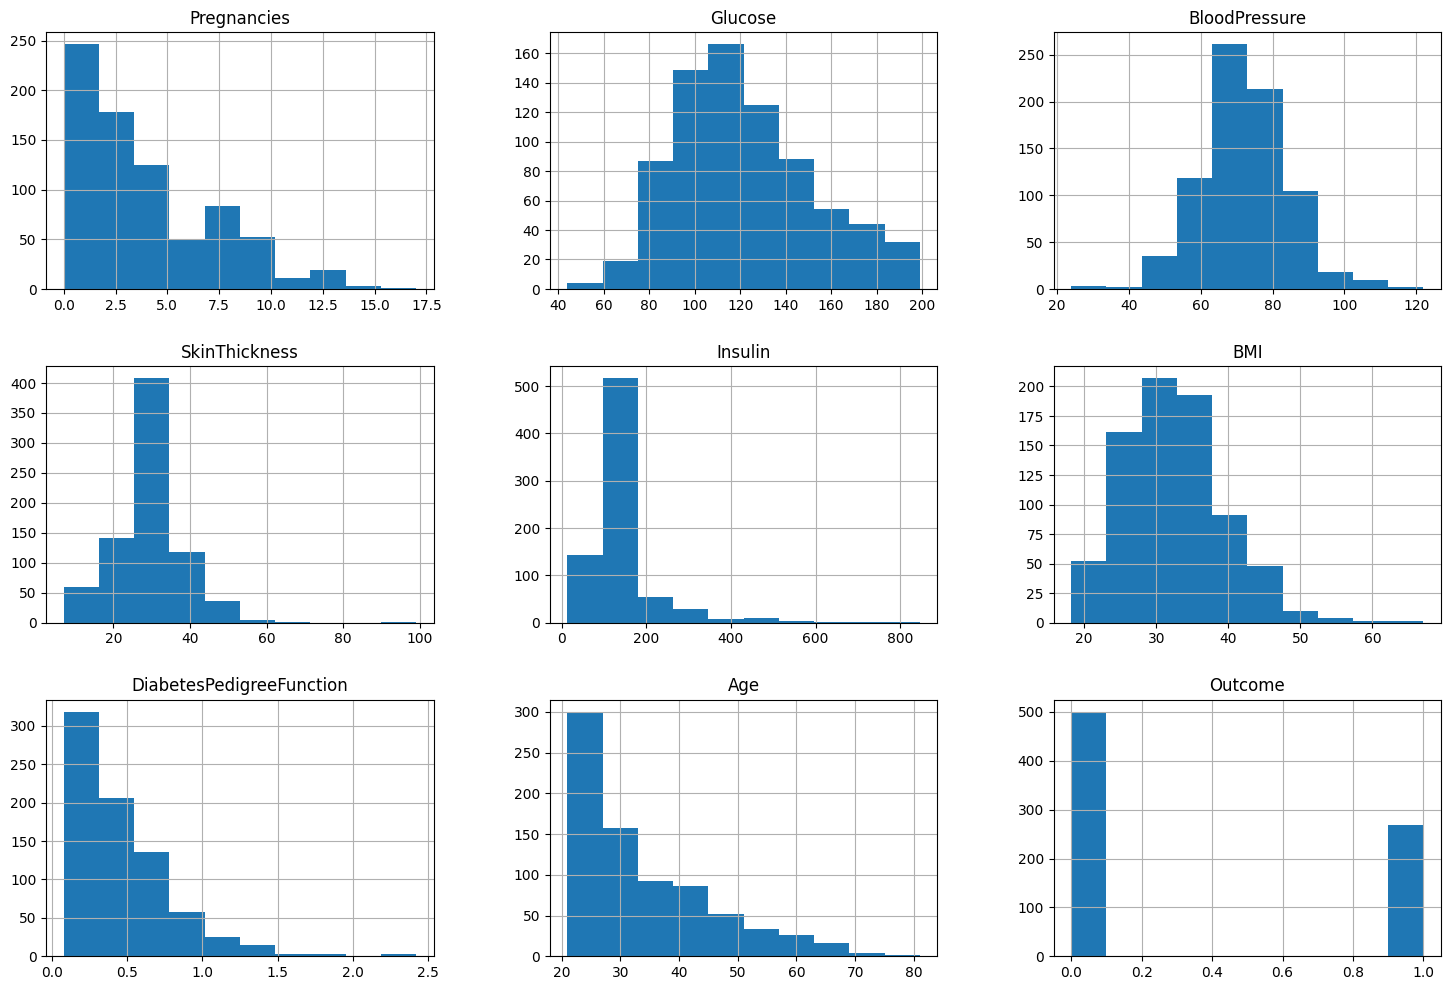

In [33]:
data.hist(figsize=(18,12))
plt.show()

<Axes: xlabel='SkinThickness'>

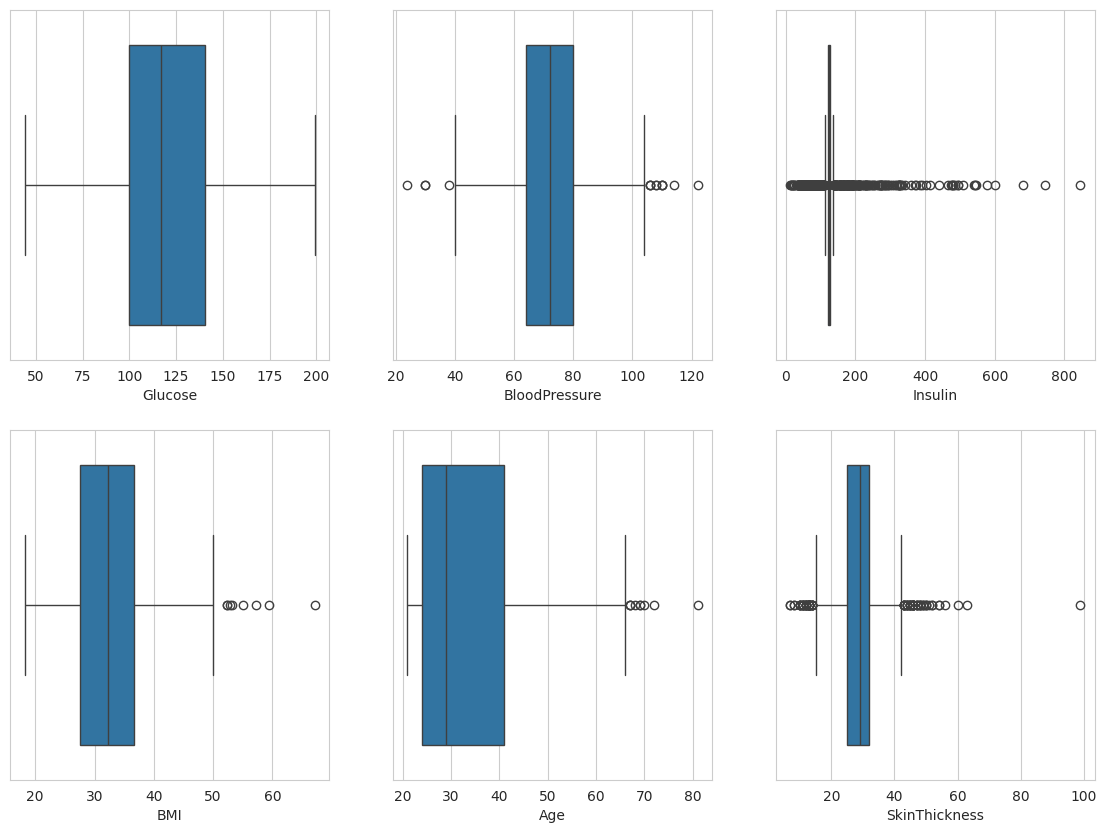

In [34]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Glucose',data=data)
plt.subplot(2,3,2)
sns.boxplot(x='BloodPressure',data=data)
plt.subplot(2,3,3)
sns.boxplot(x='Insulin',data=data)
plt.subplot(2,3,4)
sns.boxplot(x='BMI',data=data)
plt.subplot(2,3,5)
sns.boxplot(x='Age',data=data)
plt.subplot(2,3,6)
sns.boxplot(x='SkinThickness',data=data)

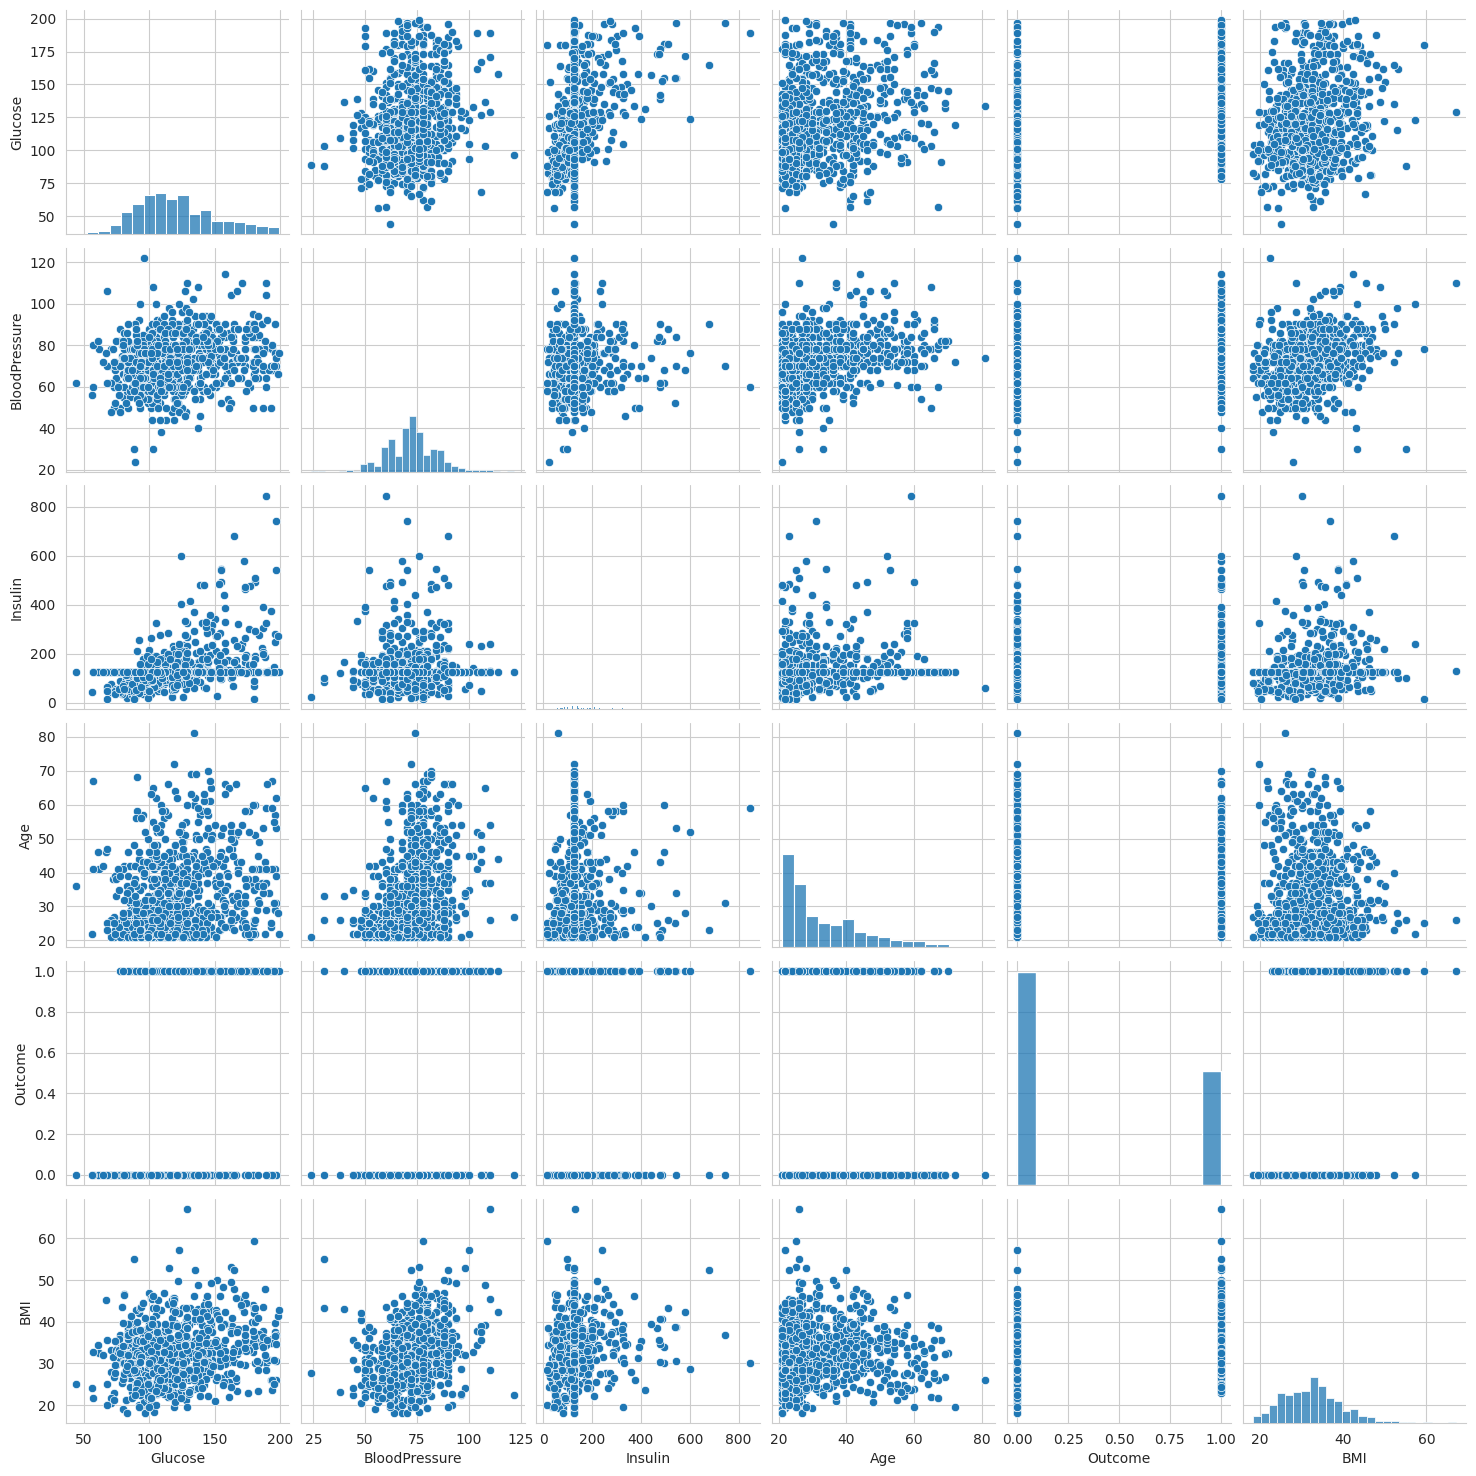

In [35]:
mean_col = ['Glucose','BloodPressure','Insulin','Age','Outcome','BMI']
sns.pairplot(data[mean_col],palette='Accent')

<Axes: xlabel='Outcome', ylabel='Insulin'>

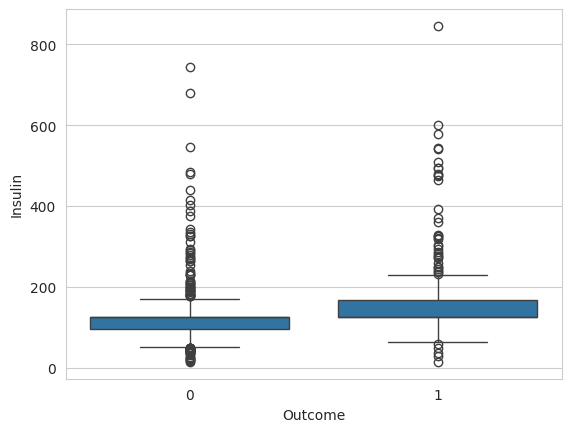

In [36]:
sns.boxplot(x='Outcome',y='Insulin',data=data)

<Axes: xlabel='BMI', ylabel='Glucose'>

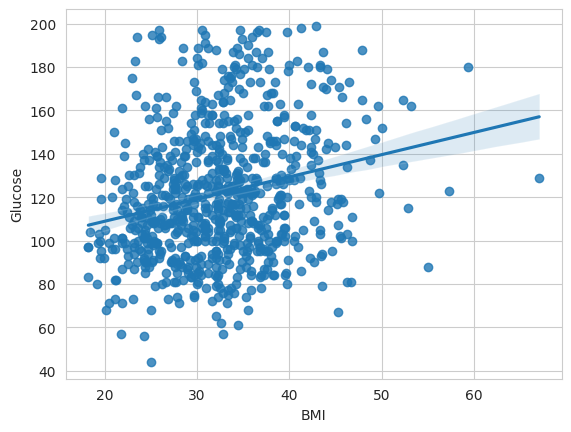

In [37]:
sns.regplot(x='BMI', y= 'Glucose', data=data)

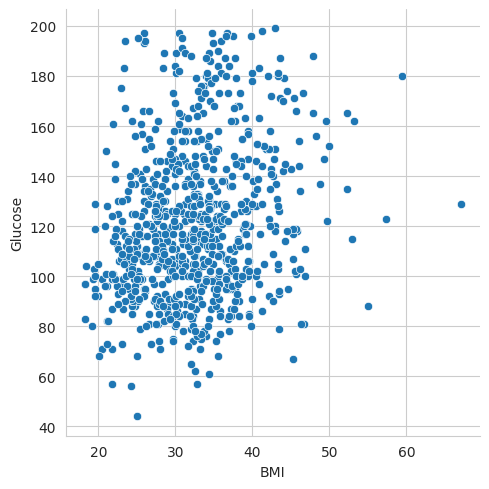

In [38]:
sns.relplot(x='BMI', y= 'Glucose', data=data)

<Axes: xlabel='Glucose', ylabel='Insulin'>

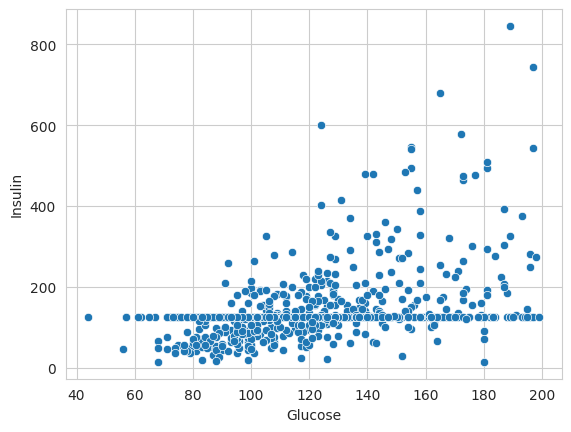

In [39]:
sns.scatterplot(x='Glucose', y= 'Insulin', data=data)

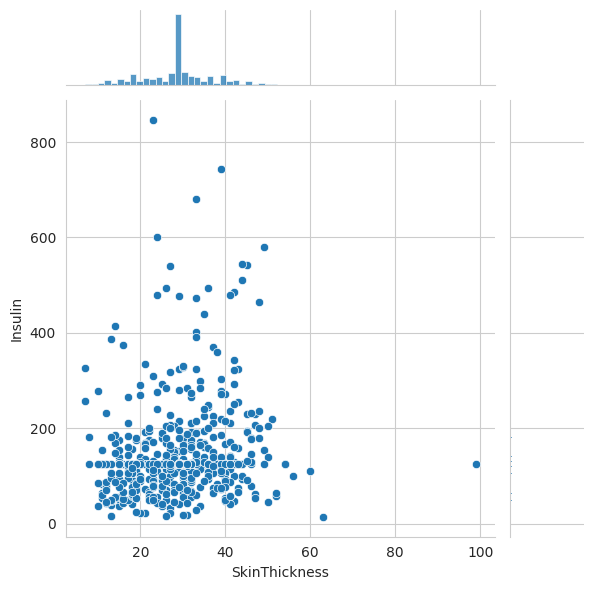

In [40]:
sns.jointplot(x='SkinThickness', y= 'Insulin', data=data)

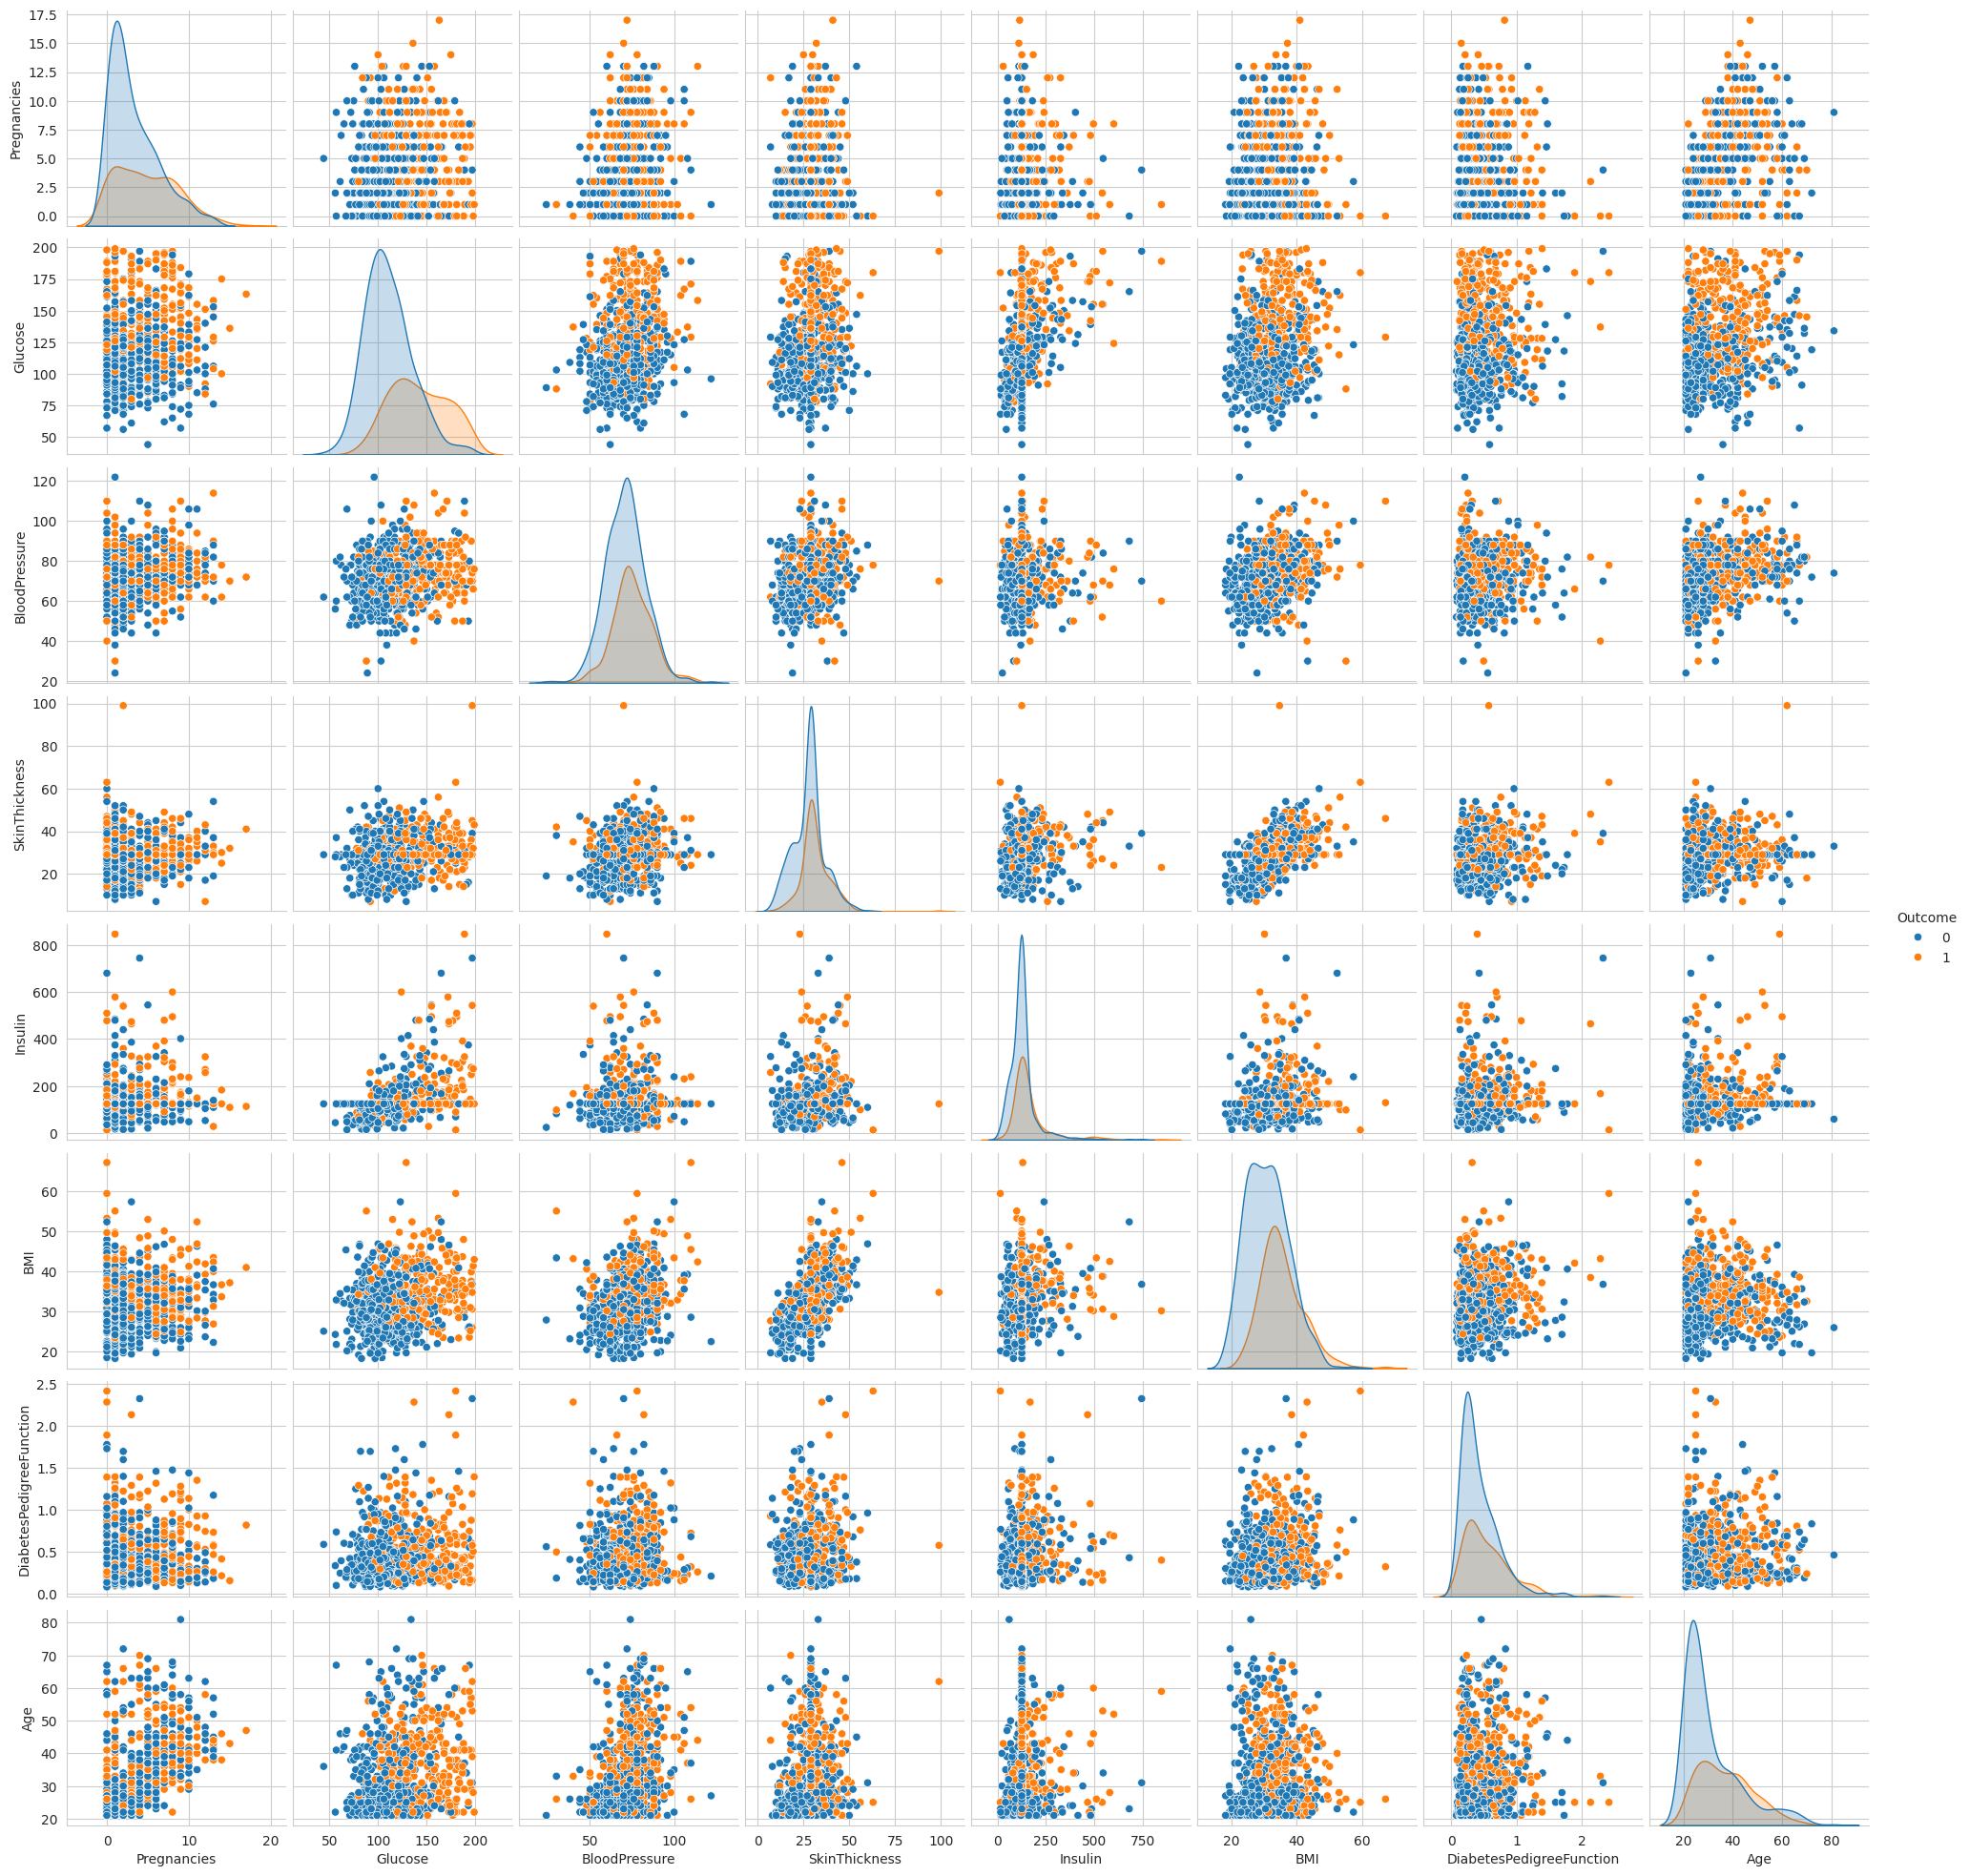

In [41]:
sns.pairplot(data,hue='Outcome')

<Axes: xlabel='Glucose', ylabel='Insulin'>

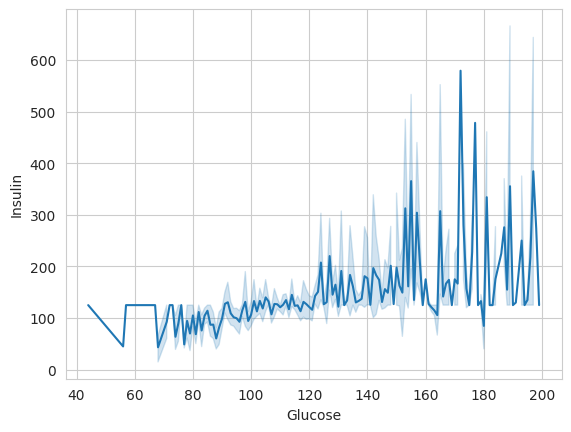

In [42]:
sns.lineplot(x='Glucose', y= 'Insulin', data=data)

<Axes: xlabel='Glucose', ylabel='Insulin'>

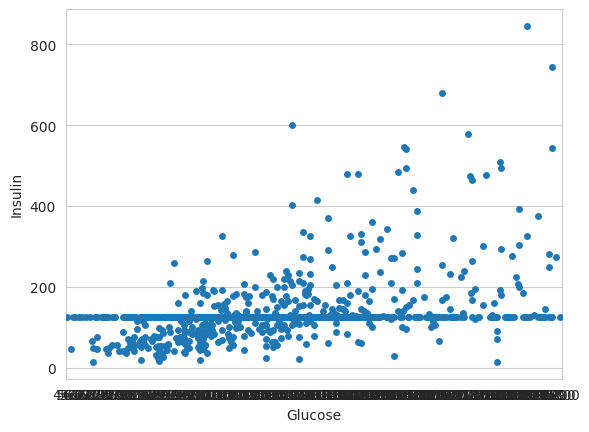

In [43]:
sns.swarmplot(x='Glucose', y= 'Insulin', data=data)

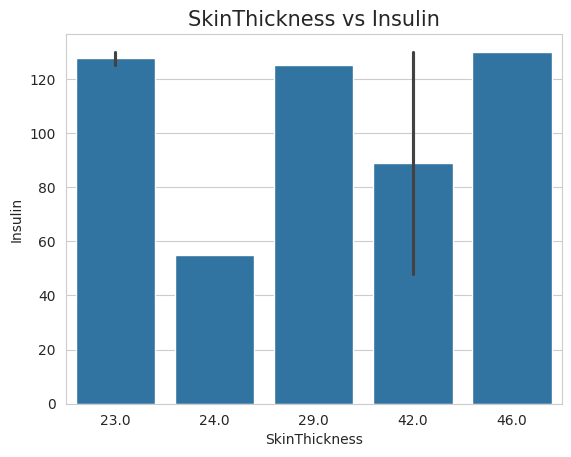

In [44]:
sns.barplot(x="SkinThickness", y="Insulin", data=data[170:180])
plt.title("SkinThickness vs Insulin",fontsize=15)
plt.xlabel("SkinThickness")
plt.ylabel("Insulin")
plt.show()
plt.style.use("ggplot")

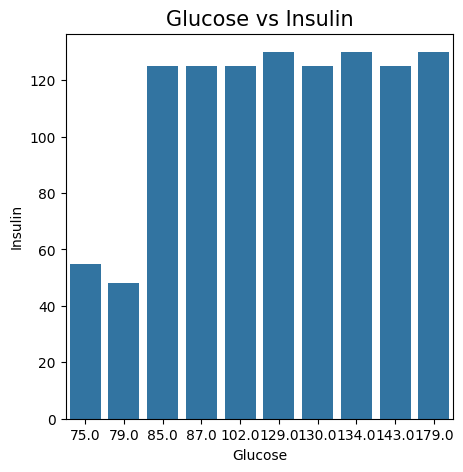

In [45]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Glucose", y="Insulin", data=data[170:180])
plt.title("Glucose vs Insulin",fontsize=15)
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.show()

# Splitting TRAINING AND TESTING DATA

In [46]:
x = data.drop(columns = 'Outcome')

y = data['Outcome']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [47]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

614
154
614
154


# Feature Selection

## Feature importnace for all features in your dataset using (Fisher’s Score)

In [48]:
fisher_selector = SelectKBest(score_func=f_classif, k='all')
fisher_selector.fit(x_train, y_train)

fisher_scores = fisher_selector.scores_

feature_names = list(x_train.columns)

feature_importance = sorted(zip(feature_names, fisher_scores), key=lambda x: x[1], reverse=True)

print("Top 4 Most Important Features Based on Fisher’s Score:")
for feature, score in feature_importance[:4]:
    print(f"{feature}: {score:.4f}")

Top 4 Most Important Features Based on Fisher’s Score:
Glucose: 193.4375
BMI: 67.1005
Age: 37.0713
Pregnancies: 23.9317


## Feature importnace for all features in your dataset using (Correlation Coefficient)

In [49]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_train_df = pd.DataFrame(X_train_scaled, columns=x_train.columns)
correlation_scores = X_train_df.corrwith(pd.Series(y_train))
feature_importance = correlation_scores.abs().sort_values(ascending=False)

print("Feature Importance based on Correlation Coefficient:")
for feature, score in feature_importance.items():
    print(f"{feature}: {score:.4f}")

Feature Importance based on Correlation Coefficient:
Pregnancies: 0.0652
SkinThickness: 0.0449
DiabetesPedigreeFunction: 0.0382
Age: 0.0308
Glucose: 0.0238
Insulin: 0.0201
BloodPressure: 0.0150
BMI: 0.0077


## Feature importnace for all features in your dataset using (Variance Threshold)

In [50]:
X_train_df = pd.DataFrame(X_train_scaled, columns=[f'Feature {i}' for i in range(X_train_scaled.shape[1])])
thresholds = [0.01, 0.05, 0.1]

for threshold in thresholds:
    selector = VarianceThreshold(threshold=threshold)
    X_selected = selector.fit_transform(X_train_df)

    selected_features = X_train_df.columns[selector.get_support()]
    print(f"\n### Features Selected with Variance Threshold = {threshold}")
    print(f"Number of Features Selected: {len(selected_features)}")
    print(f"Selected Features: {list(selected_features)}")


### Features Selected with Variance Threshold = 0.01
Number of Features Selected: 8
Selected Features: ['Feature 0', 'Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6', 'Feature 7']

### Features Selected with Variance Threshold = 0.05
Number of Features Selected: 8
Selected Features: ['Feature 0', 'Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6', 'Feature 7']

### Features Selected with Variance Threshold = 0.1
Number of Features Selected: 8
Selected Features: ['Feature 0', 'Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6', 'Feature 7']


## Features that are dependent on each other


### Highly Correlated Feature Pairs (|correlation| > 0.8) ###
No highly correlated features found.


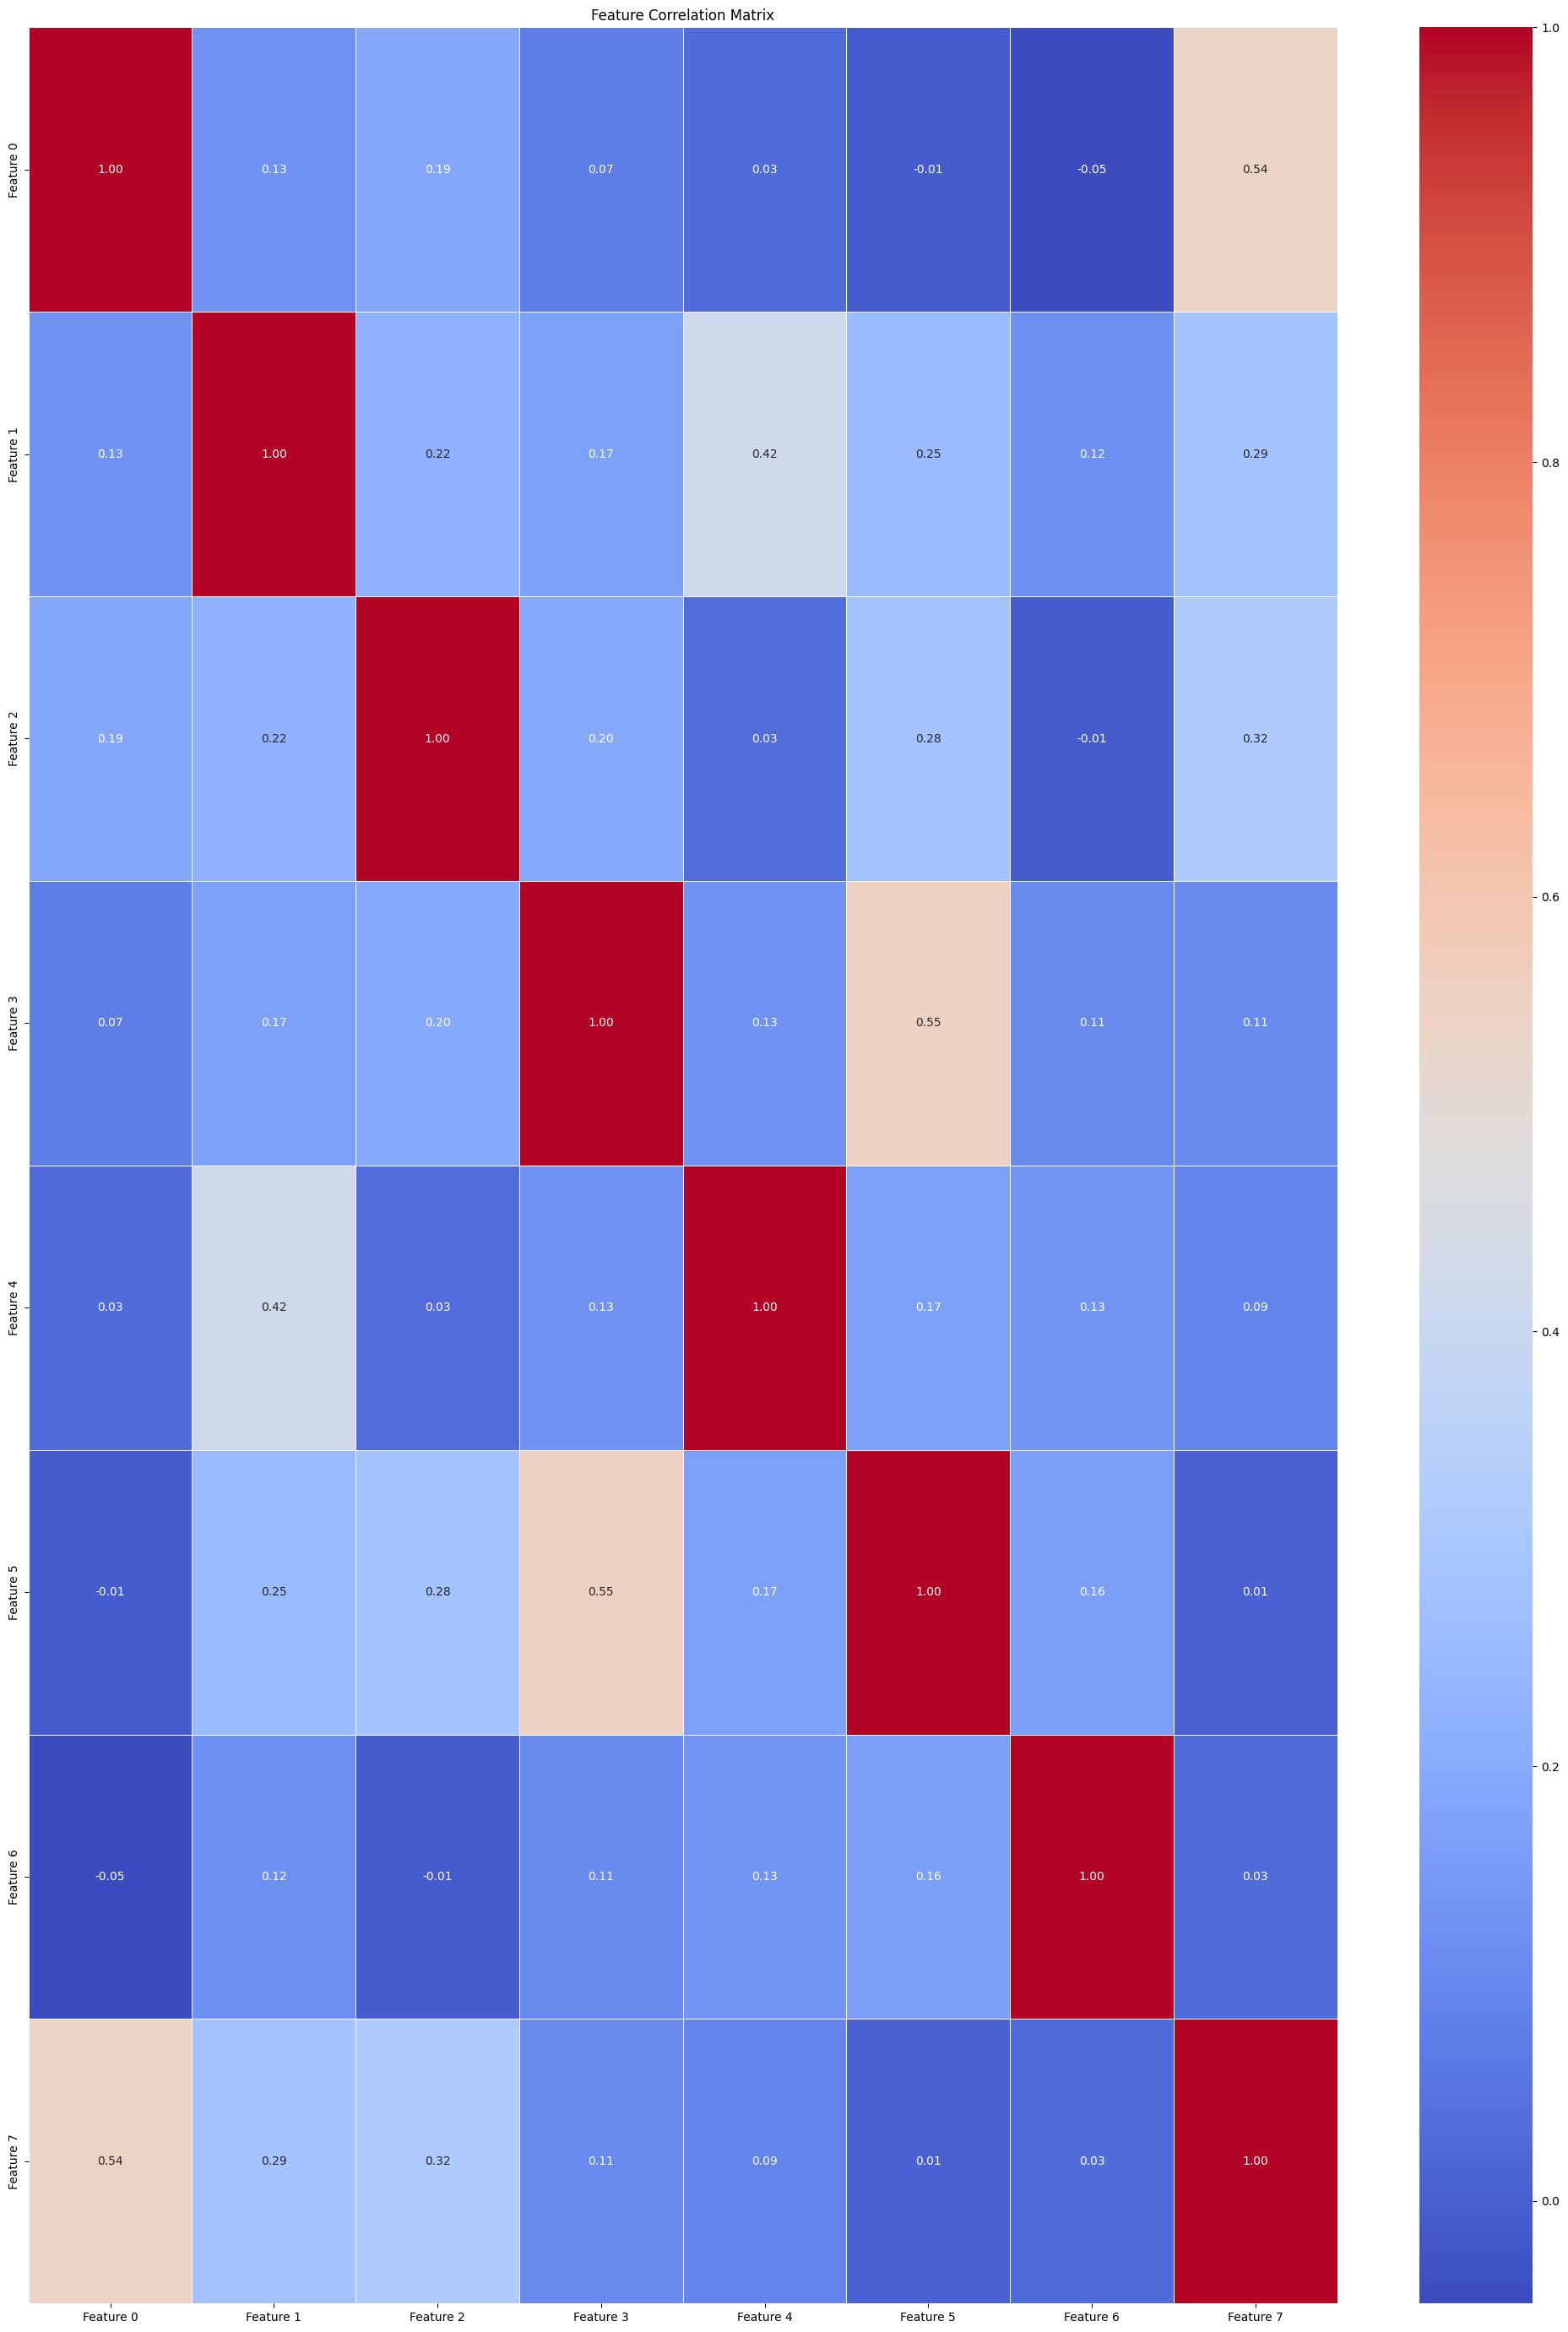

In [51]:
X_train_df = pd.DataFrame(X_train_scaled, columns=[f'Feature {i}' for i in range(X_train_scaled.shape[1])])

corr_matrix = X_train_df.corr()

threshold = 0.8
high_corr_features = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_features.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

print("\n### Highly Correlated Feature Pairs (|correlation| > 0.8) ###")
if high_corr_features:
    for feature1, feature2, corr_value in high_corr_features:
        print(f"{feature1} ↔ {feature2}: {corr_value:.2f}")
else:
    print("No highly correlated features found.")


plt.figure(figsize=(25, 35))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

## The most correlated 3 features with it using Chi-squre Test Scores.

In [52]:
target_variable = 'Outcome'

chi2_scores = []
for feature in data.columns:
    if feature != target_variable:
        contingency_table = pd.crosstab(data[feature], data[target_variable])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        chi2_scores.append((feature, chi2))

chi2_scores.sort(key=lambda x: x[1], reverse=True)

top_3_features = chi2_scores[:3]

print("Top 3 features with highest Chi-square test scores:")
for feature, score in top_3_features:
    print(f"{feature}: {score}")

Top 3 features with highest Chi-square test scores:
DiabetesPedigreeFunction: 533.0240955223882
BMI: 279.52475827456124
Glucose: 269.01296827842924


## Backward Elemination Feature Selection

In [53]:
def backward_elimination(X, y, p_threshold=0.05, vif_threshold=10):
    X = sm.add_constant(X)
    while True:
        model = sm.OLS(y, X).fit()
        p_values = model.pvalues.iloc[1:]
        VIF = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

        max_p_value = p_values.max()
        if max_p_value > p_threshold:
            feature_to_remove = p_values.idxmax()
            print(f"Removing {feature_to_remove} due to high p-value: {max_p_value:.5f}")
            X = X.drop(columns=[feature_to_remove])
            continue

        vif_values = dict(zip(X.columns, VIF))
        high_vif = {k: v for k, v in vif_values.items() if v > vif_threshold and k != 'const'}

        if high_vif:
            feature_to_remove = max(high_vif, key=high_vif.get)
            print(f"Removing {feature_to_remove} due to high VIF: {high_vif[feature_to_remove]:.2f}")
            X = X.drop(columns=[feature_to_remove])
            continue

        break

    return X, model.summary()

X_selected, model_summary = backward_elimination(x, y)
print(model_summary)

Removing SkinThickness due to high p-value: 0.92182
Removing Insulin due to high p-value: 0.39715
Removing BloodPressure due to high p-value: 0.38737
Removing Age due to high p-value: 0.23833
                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     89.22
Date:                Thu, 17 Apr 2025   Prob (F-statistic):           3.24e-62
Time:                        21:35:59   Log-Likelihood:                -373.31
No. Observations:                 768   AIC:                             756.6
Df Residuals:                     763   BIC:                             779.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  

In [54]:
def calculate_vif(x):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = x.columns
    vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif_data

def backward_elimination(x, y, p_threshold=0.05, vif_threshold=10):
    x = sm.add_constant(x)
    while True:
        model = sm.OLS(y, x).fit()
        p_values = model.pvalues.iloc[1:]

        vif = calculate_vif(x).set_index("Feature")["VIF"]

        max_p_value = p_values.max()
        if max_p_value > p_threshold:
            feature_to_remove = p_values.idxmax()
            print(f"Removing {feature_to_remove} due to high p-value: {max_p_value:.5f}")
            x = x.drop(columns=[feature_to_remove])
            continue

        high_vif = vif[vif > vif_threshold].drop("const", errors="ignore")
        if not high_vif.empty:
            feature_to_remove = high_vif.idxmax()
            print(f"Removing {feature_to_remove} due to high VIF: {high_vif[feature_to_remove]:.2f}")
            x = x.drop(columns=[feature_to_remove])
            continue

        break

    return x, model

x = sm.add_constant(x)
model_initial = sm.OLS(y, x).fit()
print("Initial Model Summary:")
print(model_initial.summary())

print("\nFeature Significance Analysis:")
feature_analysis = pd.DataFrame({"Feature": x.columns, "P-value": model_initial.pvalues, "Z-score": model_initial.params / model_initial.bse})
print(feature_analysis)

x_selected, model_selected = backward_elimination(x.drop(columns=['const']), y)

x_selected = sm.add_constant(x_selected)
final_model = sm.OLS(y, x_selected).fit()
print("\nFinal Model Summary (After Feature Selection):")
print(final_model.summary())

print("\nModel Performance Comparison:")
comparison = pd.DataFrame({
    "Metric": ["R-squared", "Adjusted R-squared", "Number of Features"],
    "Initial Model": [model_initial.rsquared, model_initial.rsquared_adj, x.shape[1] - 1],
    "Final Model": [final_model.rsquared, final_model.rsquared_adj, x_selected.shape[1] - 1]
})
print(comparison)

Initial Model Summary:
                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     44.90
Date:                Thu, 17 Apr 2025   Prob (F-statistic):           4.25e-59
Time:                        21:35:59   Log-Likelihood:                -371.86
No. Observations:                 768   AIC:                             761.7
Df Residuals:                     759   BIC:                             803.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
c

# Sama Mohamed / 202201867

## 1. Logistic Regression

### logistic reg Assumptions


In [55]:
#Assumption 1: Appropriate outcome type (Must be categorical)
print(y.nunique())

2


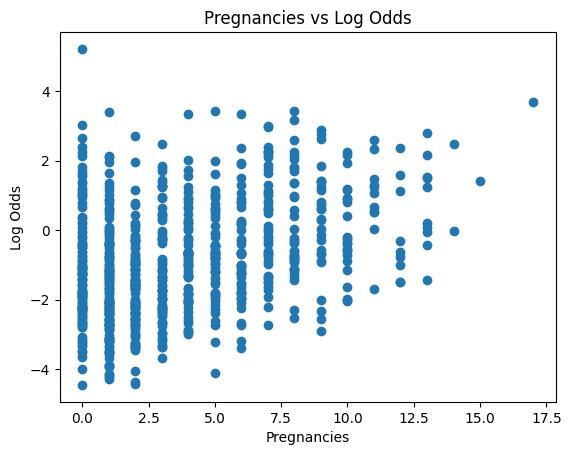

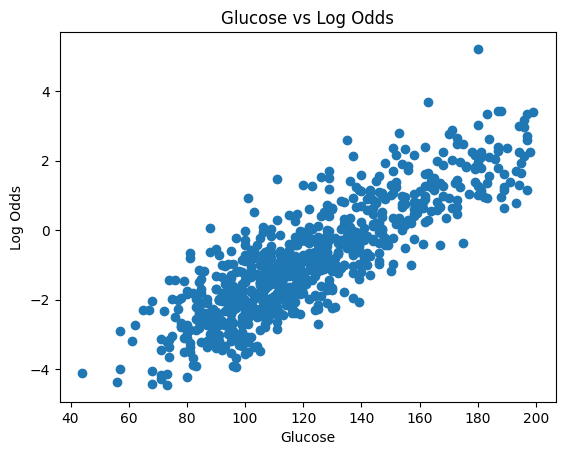

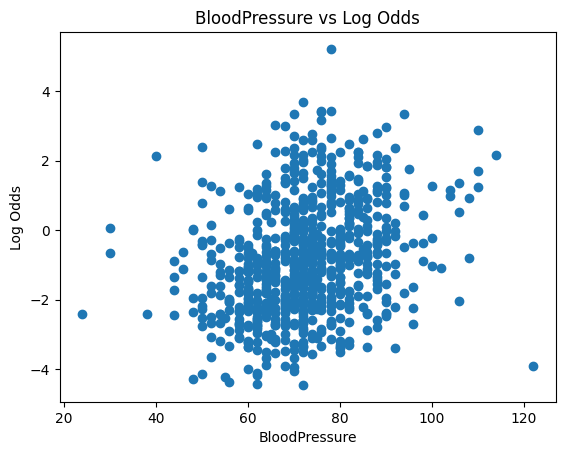

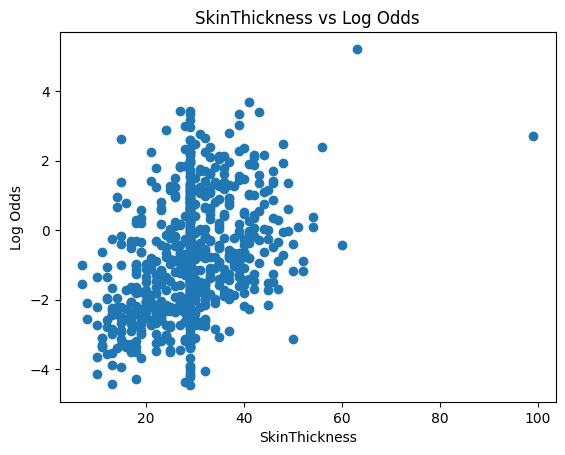

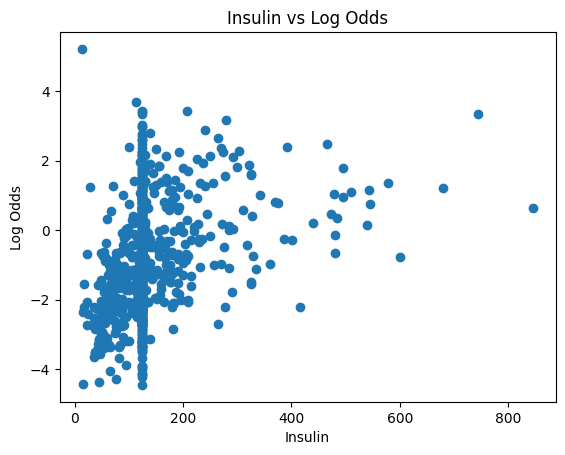

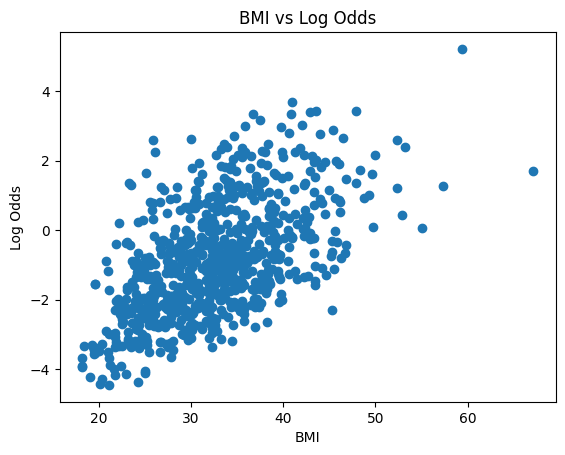

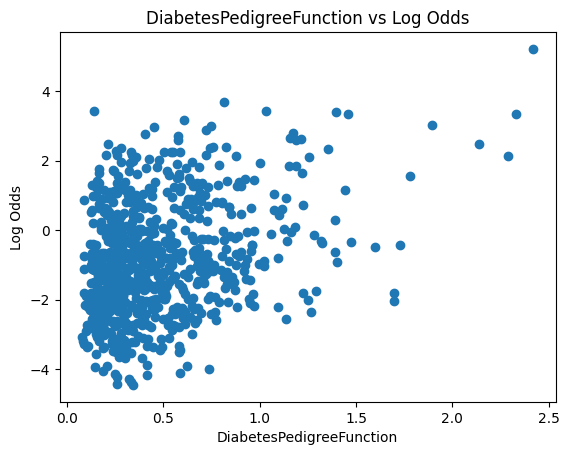

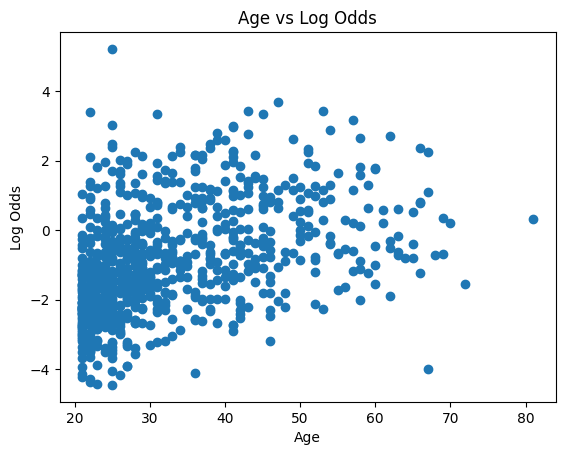

In [56]:
##Assumption 2: Linearity of independent variables and log odds
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families

logit_results = GLM(y, x, family=families.Binomial()).fit()
predicted = logit_results.predict(x)


log_odds = np.log(predicted / (1 - predicted))

for column in x_train.columns:
  plt.scatter(x = x[column].values, y = log_odds);
  plt.xlabel(column)
  plt.ylabel('Log Odds')
  plt.title(f'{column} vs Log Odds')
  plt.show()

In [57]:
# y_pred = np.where(predicted > 0.5, 1, 0)

In [58]:
# print(accuracy_score(y,y_pred)*100)

In [59]:
#Assumption 3: No strongly influential outliers
from scipy import stats


influence = logit_results.get_influence()

summ_df = influence.summary_frame()

diagnosis_df = summ_df.loc[:,['cooks_d']]


diagnosis_df['std_resid'] = stats.zscore(logit_results.resid_pearson)
diagnosis_df['std_resid'] = diagnosis_df.loc[:,'std_resid'].apply(lambda x: np.abs(x))

diagnosis_df.sort_values("cooks_d", ascending=False)
diagnosis_df.head()

cooks_d  std_resid
0  0.000351   0.677160
1  0.000010   0.176260
2  0.000577   0.543177
3  0.000010   0.178008
4  0.000565   0.382228

Threshold for Cook Distance = 0.005208333333333333


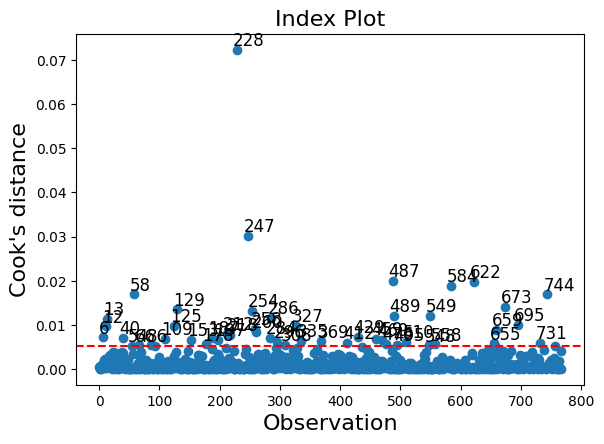

In [60]:
cook_threshold = 4 / len(data)
print(f"Threshold for Cook Distance = {cook_threshold}")


fig = influence.plot_index(y_var="cooks", threshold=cook_threshold)
plt.axhline(y = cook_threshold, ls="--", color='red')
fig.tight_layout(pad=2)

In [61]:
outliers = diagnosis_df[diagnosis_df['cooks_d'] > cook_threshold]
prop_outliers = round(100*(len(outliers) / len(data)),1)
print(f'Proportion of data points that are highly influential = {prop_outliers}%')

Proportion of data points that are highly influential = 6.4%


In [62]:
extreme = diagnosis_df[(diagnosis_df['cooks_d'] > cook_threshold) &
                       (diagnosis_df['std_resid'] > 3)]
prop_extreme = round(100*(len(extreme) / len(data)),1)

In [63]:
extreme.sort_values("cooks_d", ascending=False).head()

cooks_d  std_resid
228  0.072340   5.444951
487  0.020001   3.838664
622  0.019733   5.428899
744  0.016906   4.128511
489  0.012050   3.122042

In [64]:
#Assumption 4: Absence of multicollinearity

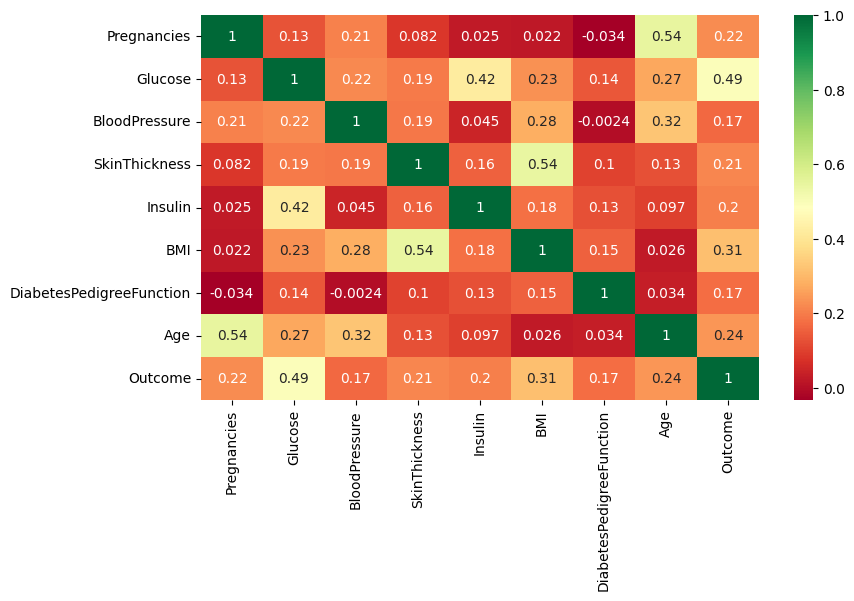

In [65]:
corrMatrix = data.corr()
plt.subplots(figsize=(9, 5))
sns.heatmap(corrMatrix, annot=True, cmap="RdYlGn")
plt.show()

In [66]:
data = data.astype(np.float64)

In [67]:
# Use variance inflation factor to identify any significant multi-collinearity
def calc_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

calc_vif(data)

variables        VIF
0               Pregnancies   3.365145
1                   Glucose  24.181810
2             BloodPressure  33.895891
3             SkinThickness  17.325528
4                   Insulin   4.530475
5                       BMI  34.005998
6  DiabetesPedigreeFunction   3.169422
7                       Age  14.358337
8                   Outcome   2.006922

In [68]:
#Assumption 5: Independence of observations

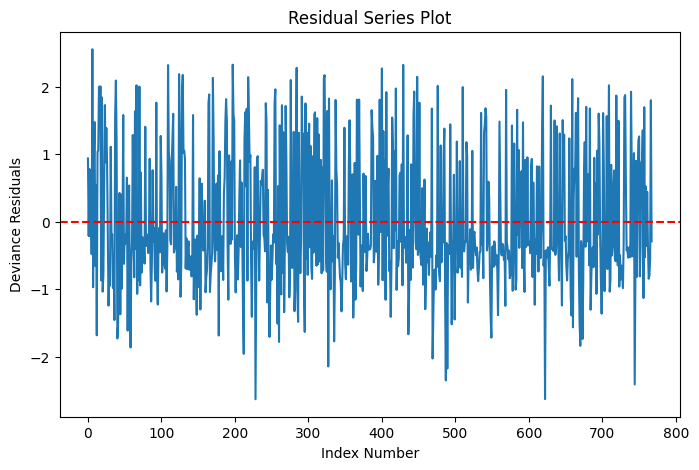

In [69]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, title="Residual Series Plot",
                     xlabel="Index Number",
                     ylabel="Deviance Residuals")

ax.plot(data.index.tolist(),
        stats.zscore(logit_results.resid_deviance))

plt.axhline(y = 0, ls="--", color='red')

In [70]:
#Assumption 6: Sufficiently large sample size
print(f'The total number of observations: {len(data)}')

The total number of observations: 768


### Running the model on test data

In [71]:
logit_results = GLM(y_train, x_train, family=families.Binomial()).fit()
predicted = logit_results.predict(x_test)

In [72]:
y_pred = np.where(predicted > 0.5, 1, 0)

In [73]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))


Classification Report is:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75       107
           1       0.43      0.43      0.43        47

    accuracy                           0.65       154
   macro avg       0.59      0.59      0.59       154
weighted avg       0.65      0.65      0.65       154

Confusion Matrix:
 [[80 27]
 [27 20]]
Mean Squared Error:
 0.35064935064935066
R2 score is:
 -0.6536090674090276


In [74]:
print(accuracy_score(y_test,y_pred)*100)

64.93506493506493


## 2. XGBClassifier

In [75]:
from xgboost import XGBClassifier

xgb =XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xgb.fit(x_train, y_train)


XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, ...)

In [76]:
y_pred=xgb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",xgb.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83       107
           1       1.00      0.06      0.12        47

    accuracy                           0.71       154
   macro avg       0.85      0.53      0.47       154
weighted avg       0.80      0.71      0.61       154

Confusion Matrix:
 [[107   0]
 [ 44   3]]
Training Score:
 68.72964169381108
Mean Squared Error:
 0.2857142857142857
R2 score is:
 -0.3473851660369853


In [77]:
xbg_accuracy=print(accuracy_score(y_test,y_pred)*100)

71.42857142857143


## 3. Neural network

In [78]:
from sklearn.neural_network import MLPClassifier

In [79]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(x_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [80]:
y_pred = clf.predict(x_test)

In [81]:
nn_accuracy=print(accuracy_score(y_test,y_pred)*100)

68.83116883116884
